# Definisi Kasus

# Analisis Klaster Spasial Provinsi di Indonesia Berdasarkan Indikator Kesehatan Ibu Tahun 2022 Menggunakan Metode Klaster Hirarki dan Non Hirarki

Publikasi Profil Kesehatan Ibu dan Anak 2022 menyajikan statistik dan indikator seputar kesehatan penduduk Indonesia secara umum salah satunya kesehatan ibu Indonesia. Beberapa informasi disajikan mengenai indikator kesehatan ibu Indonesia meliputi:
- Prov  : 34 provinsi di Indonesia
- RJPRM (X1) : Rata-rata jumlah rokok yang dihisap ibu per minggu 2022
- PIMLL (X2) : Persentase ibu merokok (dari semua ibu perokok) dengan jumlah >= 15 batang per hari 2022
- PIMAM (X3) : Persentase ibu yang melahirkan anak meninggal 2022
- PIMAHB (X4) : Persentase ibu yang melahirkan anak dengan berat badan rendah 2022
- PIRI  (X5) : Persentase ibu yang rawat inap dengan jaminan kesehatan 2022
- PIKRJ (X6) : Persentase ibu yang memiliki keluhan sakit dan rawat jalan 2022

Berdasarkan data indikator kesehatan ibu Indonesia 2022, akan dilakukan analisis klaster secara spasial menggunakan metode hirarki dan non hirarki untuk mengelompokkan provinsi dengan kesehatan ibu yang baik dan buruk untuk program kesehatan pemerintah terbaru ke depannya.

In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Load Data

In [2]:
momhealth = pd.read_csv("Mom Health Indicator 2022.csv", sep = ",")
df = momhealth.copy()
df

,Prov,X1,X2,X3,X4,X5,X6
0,Aceh,70,15.27,30.51,15.48,96.70,59.01
1,Sumatera Utara,56,10.80,43.39,11.93,68.99,23.10
2,Sumatera Barat,97,45.80,37.30,10.17,72.73,41.93
3,Riau,76,17.77,40.86,11.12,70.83,45.55
4,Jambi,101,57.25,35.39,12.94,67.45,31.12
5,Sumatera Selatan,64,7.66,36.18,12.02,67.42,37.45
6,Bengkulu,87,30.57,35.76,10.41,80.64,32.40
7,Lampung,87,40.10,34.26,12.72,61.85,32.03
8,Kep. Bangka Belitung,96,31.43,33.65,12.09,78.17,43.47
9,Kep. Riau,133,36.65,33.42,10.20,79.44,58.91


In [3]:
df.isnull().sum()

Prov    0
X1      0
X2      0
X3      0
X4      0
X5      0
X6      0
dtype: int64

In [4]:
sum(df.duplicated())

0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Prov    34 non-null     object 
 1   X1      34 non-null     int64  
 2   X2      34 non-null     float64
 3   X3      34 non-null     float64
 4   X4      34 non-null     float64
 5   X5      34 non-null     float64
 6   X6      34 non-null     float64
dtypes: float64(5), int64(1), object(1)
memory usage: 2.0+ KB


# Eksplorasi Data

In [6]:
# Memilih kolom yang ingin disertakan
num_cols = ['X1', 'X2', 'X3','X4', 'X5', 'X6']

# DataFrame baru tanpa beberapa kolom
df_num = df[num_cols]
df_num.head()

,X1,X2,X3,X4,X5,X6
0,70,15.27,30.51,15.48,96.70,59.01
1,56,10.80,43.39,11.93,68.99,23.10
2,97,45.80,37.30,10.17,72.73,41.93
3,76,17.77,40.86,11.12,70.83,45.55
4,101,57.25,35.39,12.94,67.45,31.12


**Statistika Deskriptif**

In [7]:
df_num.describe()

,X1,X2,X3,X4,X5,X6
count,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000
mean,76.500000,26.316765,37.116471,13.064412,78.771471,46.781176
std,24.579186,17.712208,6.326019,2.305446,9.943593,13.365644
min,34.000000,3.590000,26.410000,10.170000,60.990000,21.280000
25%,61.000000,14.040000,31.605000,11.212500,70.620000,37.685000
50%,77.000000,21.445000,35.970000,12.680000,78.960000,44.585000
75%,87.750000,36.615000,40.727500,14.555000,86.660000,58.390000
max,133.000000,84.470000,51.130000,19.190000,96.700000,67.610000


**Deteksi Outlier**

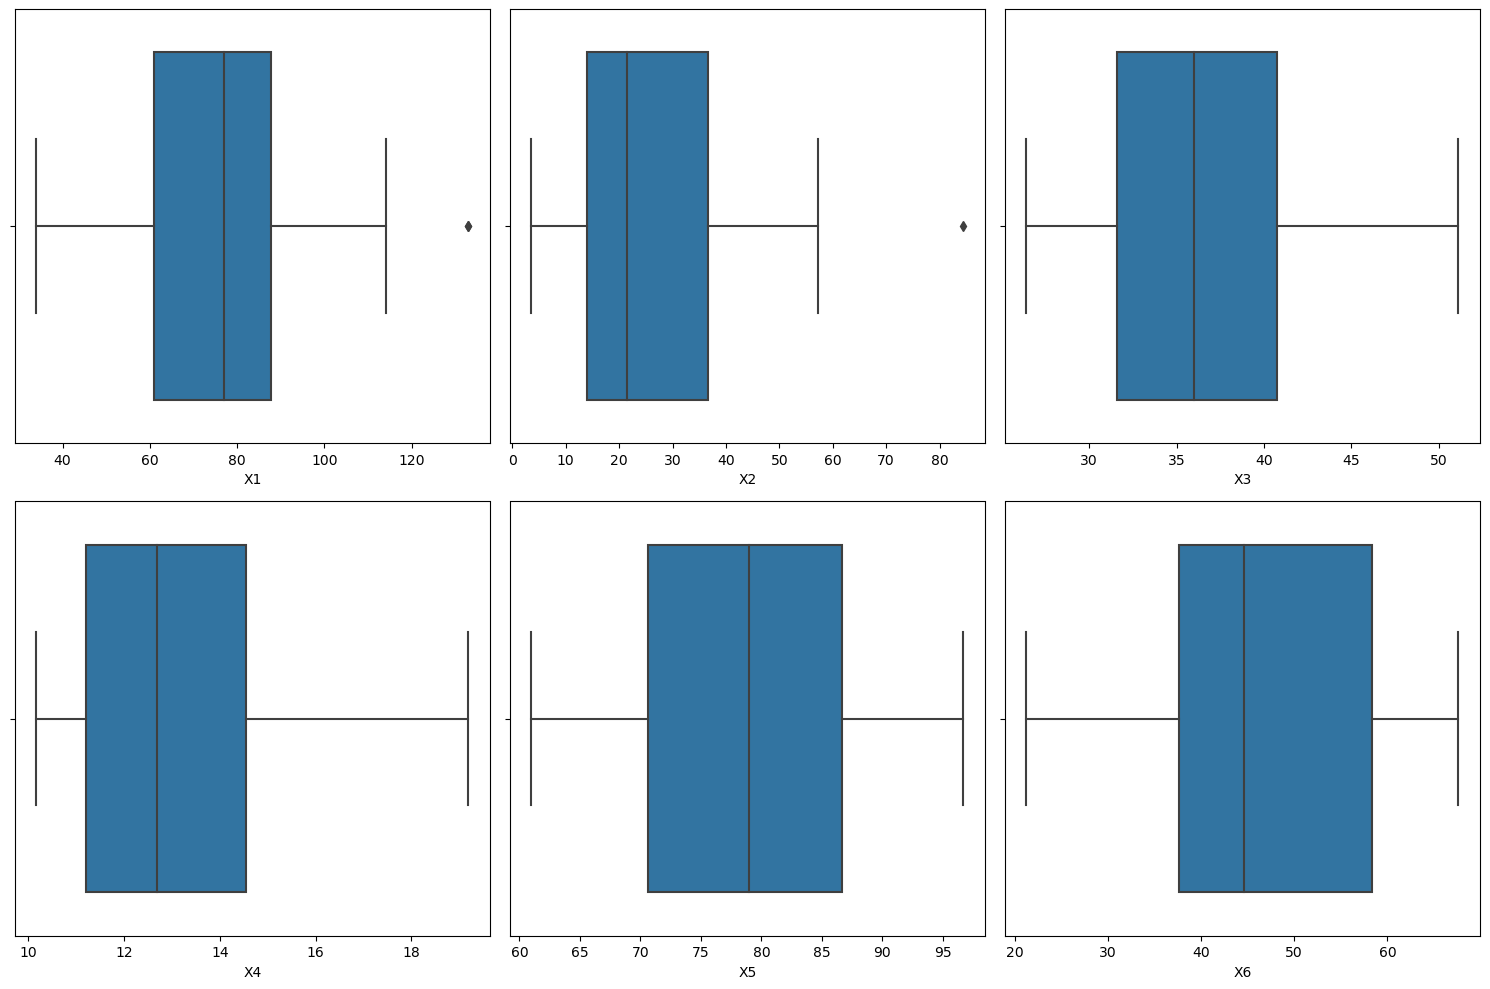

In [8]:
numeric_cols = df_num.select_dtypes(include=[np.number]).columns.tolist()

# Hitung jumlah baris dan kolom untuk subplot
n = len(numeric_cols)
ncols = 3
nrows = 2

# Buat subplot dengan ukuran yang disesuaikan
fig, axs = plt.subplots(nrows, ncols, figsize=(5*ncols, 5*nrows), dpi=100)

# Jika hanya ada satu kolom numerik, axs bukanlah array
if nrows == 1:
    axs = [axs]

for i, col in enumerate(numeric_cols):
    try:
        sns.boxplot(x=col, data=df_num, ax=axs[i//ncols, i%ncols])
    except:
        continue

plt.tight_layout()
plt.show()

In [9]:
# Mengambil kolom numerik
numeric_cols = df_num.select_dtypes(include=[np.number]).columns.tolist()

for col in numeric_cols:
    try:
        # Menghitung IQR
        Q1 = df_num[col].quantile(0.25)
        Q3 = df_num[col].quantile(0.75)
        IQR = Q3 - Q1

        # Mendefinisikan aturan untuk outlier
        outlier_condition = (df_num[col] < (Q1 - 1.5 * IQR)) | (df_num[col] > (Q3 + 1.5 * IQR))

        # Menghitung jumlah outlier
        num_outliers = outlier_condition.sum()
        print(f"Jumlah outlier untuk '{col}': {num_outliers}")
    except:
        continue

Jumlah outlier untuk 'X1': 2
Jumlah outlier untuk 'X2': 1
Jumlah outlier untuk 'X3': 0
Jumlah outlier untuk 'X4': 0
Jumlah outlier untuk 'X5': 0
Jumlah outlier untuk 'X6': 0


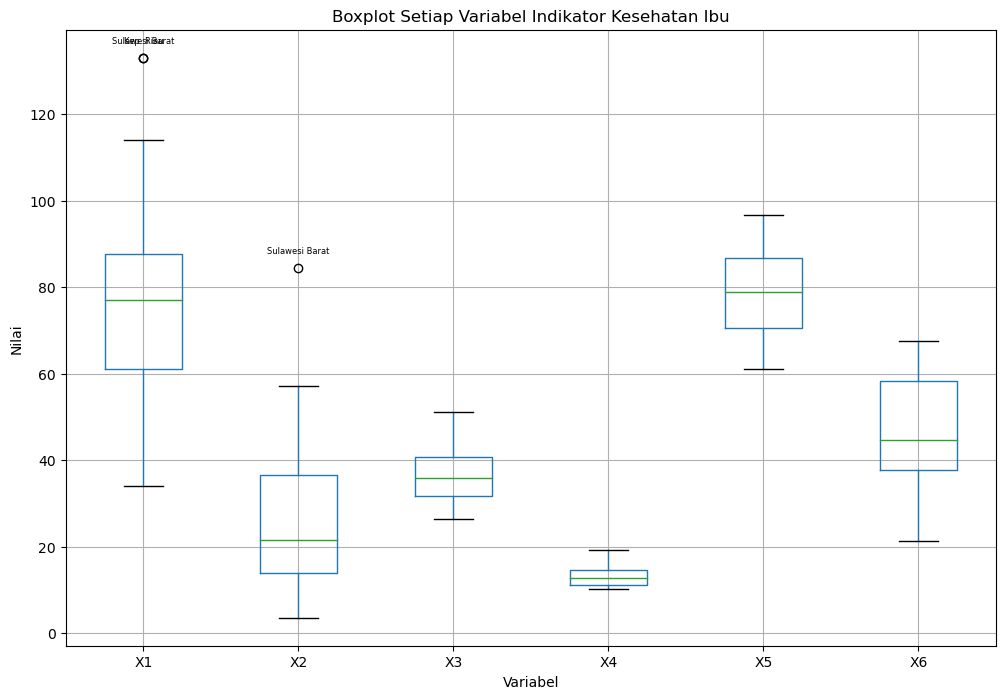

In [10]:
df = momhealth.copy()

# Variables to be plotted
variables = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6']

# Create a figure
plt.figure(figsize=(12, 8))

# Create the boxplot
df[variables].boxplot()

# Calculate IQR and find outliers
for var in variables:
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[var] < lower_bound) | (df[var] > upper_bound)]
    for index, row in outliers.iterrows():
        plt.annotate(row['Prov'], 
                     (variables.index(var) + 1, row[var]), 
                     textcoords="offset points", 
                     xytext=(0,10), 
                     ha='center',
                     fontsize=6)  # Adjust fontsize here

# Customize the plot
plt.title('Boxplot Setiap Variabel Indikator Kesehatan Ibu')
plt.xlabel('Variabel')
plt.ylabel('Nilai')
plt.xticks(range(1, len(variables) + 1), variables)
plt.show()


**Heatmap Korelasi**

<Axes: >

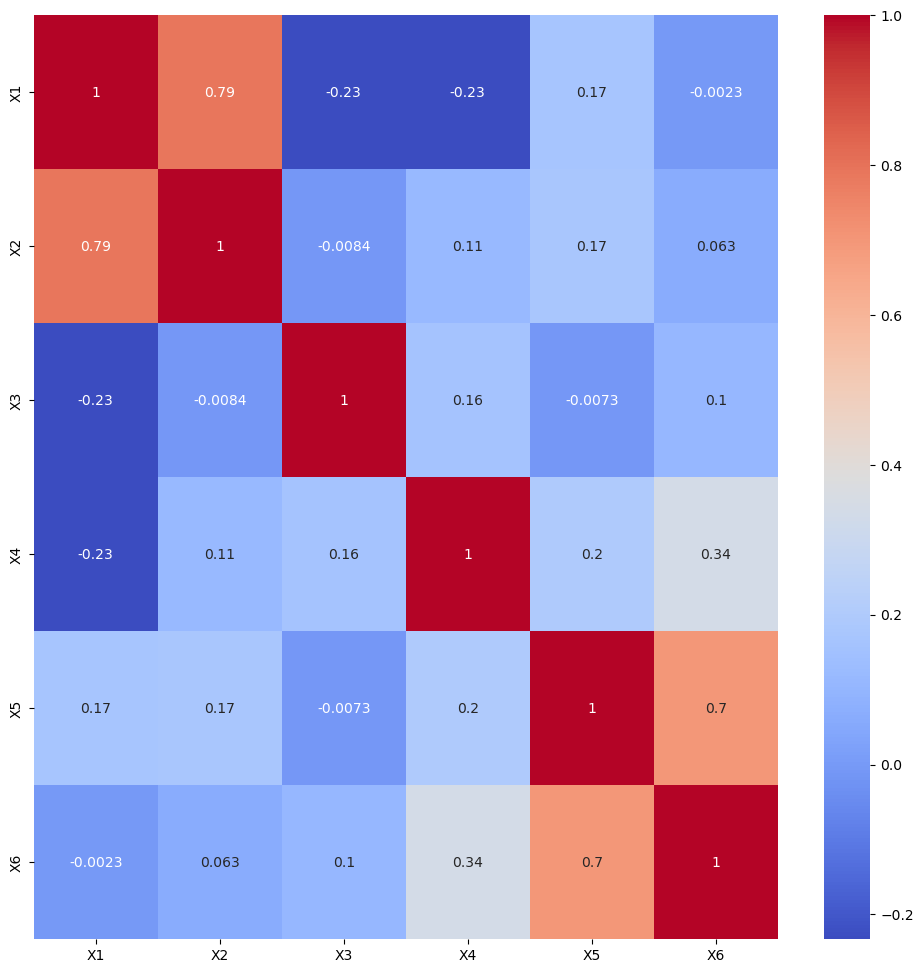

In [11]:
# Heatmap to see if there are many correlated features
plt.figure(figsize=(12,12))
sns.heatmap(df_num.corr(), annot=True, cmap='coolwarm')

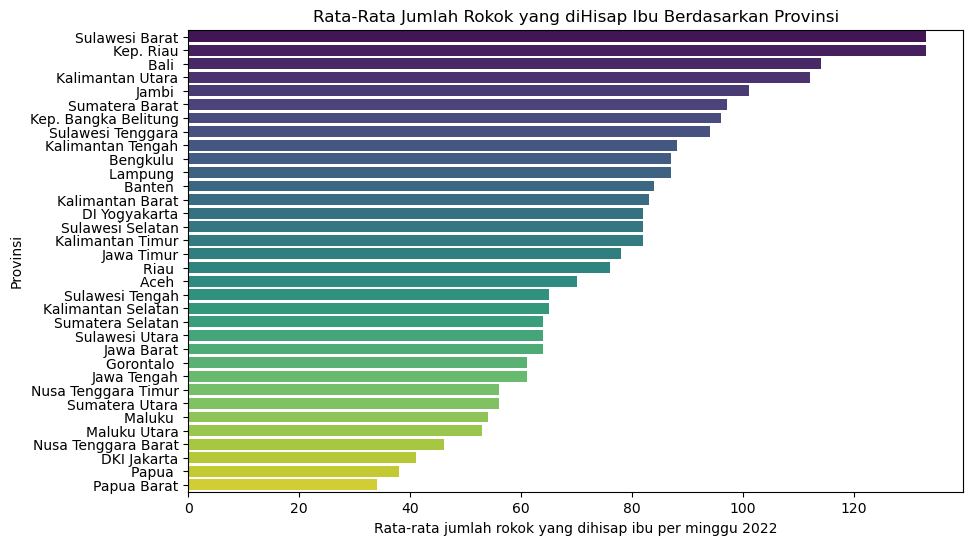

In [12]:
#Barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='X1', y='Prov', data=df, orient='h', palette='viridis', order=df.sort_values('X1', ascending=False)['Prov'])
plt.xlabel('Rata-rata jumlah rokok yang dihisap ibu per minggu 2022')
plt.ylabel('Provinsi')
plt.title('Rata-Rata Jumlah Rokok yang diHisap Ibu Berdasarkan Provinsi')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


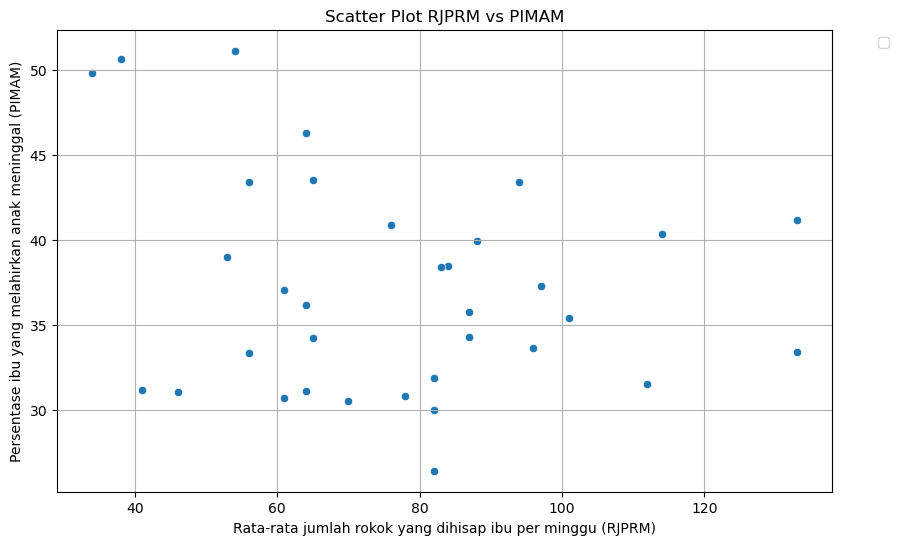

In [13]:
#Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='X1', y='X3', data=df)
plt.title('Scatter Plot RJPRM vs PIMAM')
plt.xlabel('Rata-rata jumlah rokok yang dihisap ibu per minggu (RJPRM)')
plt.ylabel('Persentase ibu yang melahirkan anak meninggal (PIMAM)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

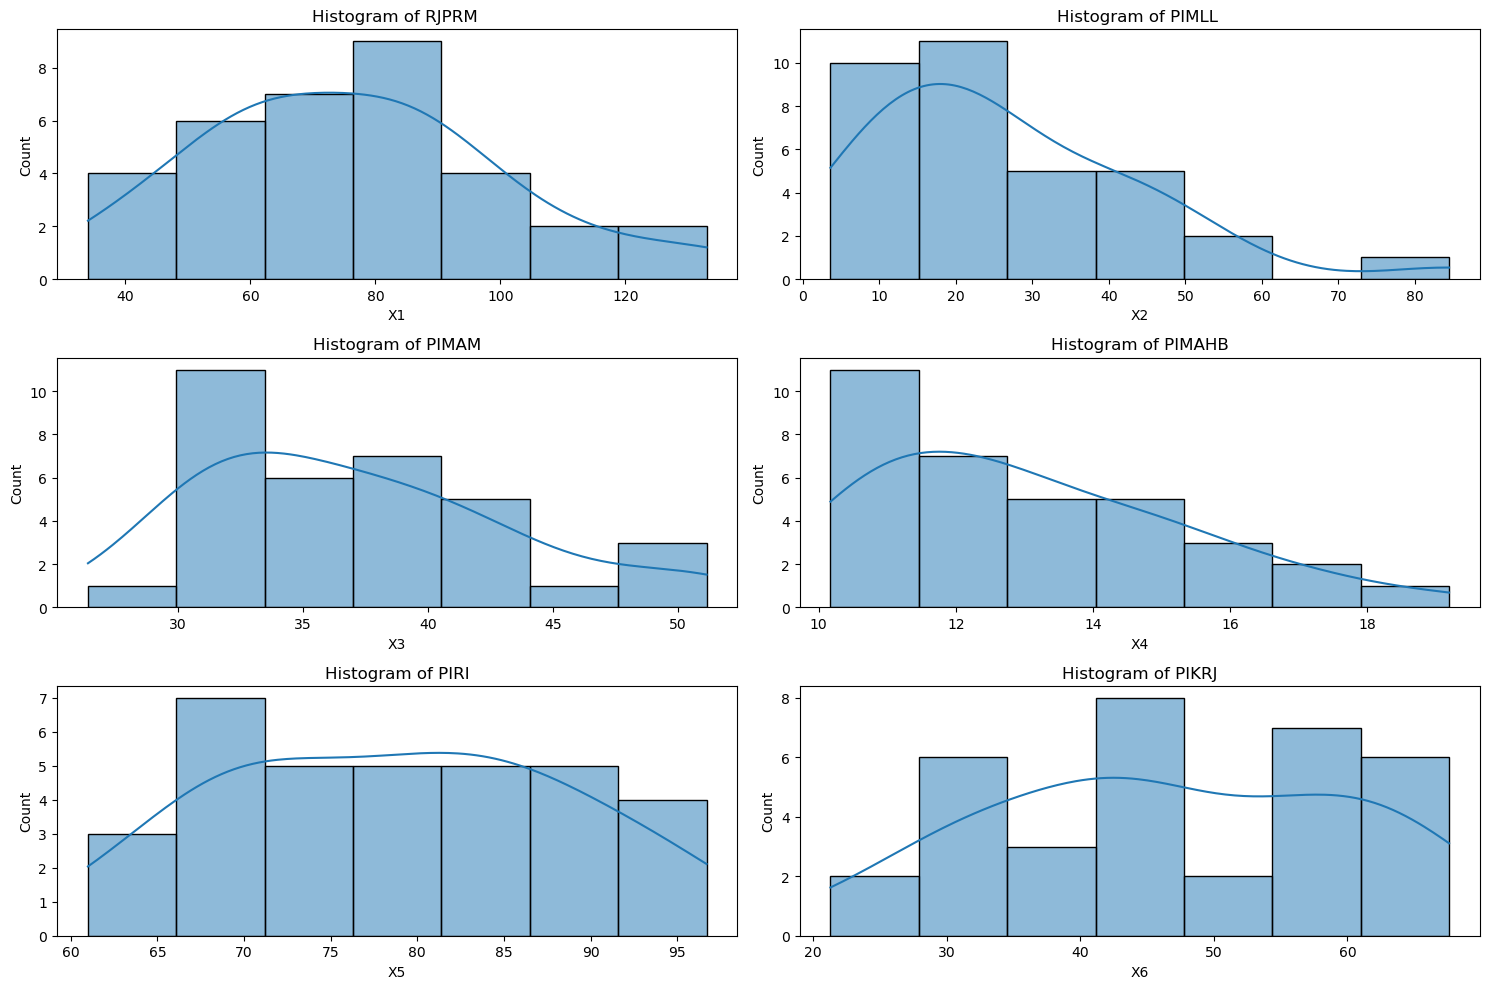

In [14]:
#Histogram
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))

# Plot histogram untuk setiap variabel
sns.histplot(data=df, x='X1', kde=True, ax=axes[0, 0])
sns.histplot(data=df, x='X2', kde=True, ax=axes[0, 1])
sns.histplot(data=df, x='X3', kde=True, ax=axes[1, 0])
sns.histplot(data=df, x='X4', kde=True, ax=axes[1, 1])
sns.histplot(data=df, x='X5', kde=True, ax=axes[2, 0])
sns.histplot(data=df, x='X6', kde=True, ax=axes[2, 1])

# Mengatur judul subplot
axes[0, 0].set_title('Histogram of RJPRM ')
axes[0, 1].set_title('Histogram of PIMLL ')
axes[1, 0].set_title('Histogram of PIMAM')
axes[1, 1].set_title('Histogram of PIMAHB')
axes[2, 0].set_title('Histogram of PIRI')
axes[2, 1].set_title('Histogram of PIKRJ')

# Menampilkan plot
plt.tight_layout()
plt.show()

# Uji Multikolinearitas

In [15]:
# Menghitung Nilai VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
# Menambahkan kolom konstanta untuk menghitung VIF
X = add_constant(df_num)

# Menghitung VIF untuk setiap variabel
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Menampilkan hasil VIF
print(vif_data)

  Variable         VIF
0    const  210.157380
1       X1    4.300290
2       X2    3.871620
3       X3    1.172487
4       X4    1.605153
5       X5    2.087840
6       X6    2.187375


Tidak multiko karena VIF < 10

# Clustering

Pemilihan banyaknya klaster yang terbentuk berdasarkan nilai Pseudo F Statistics yang tertinggi pada metode dan klaster tertentu.

Metode yang digunakan untuk hirarki meliputi:
- Single Linkage
- Complete Linkage
- Average Linkage
- Ward Linkage

Metode yang digunakan untuk non hirarki yaitu 
- K-Means

Dengan asumsi klaster:
- 2 : tinggi dan rendah
- 3 : tinggi, sedang, dan rendah
- 4 : tinggi, sedang, rendah, sangat rendah
- 5 : sangat tinggi, tinggi, sedang, rendah, sangat rendah

In [20]:
# Menghapus kolom 'Prov' untuk clustering
data = df_num

# Inisialisasi StandardScaler
scaler = StandardScaler()
# Fit scaler ke data numerik dalam DataFrame
scaled_data = scaler.fit_transform(data)
# Transformasi data numerik dalam DataFrame
data = pd.DataFrame(scaled_data, columns=data.columns)

# Definisi fungsi untuk menghitung SSW dan SSB
def compute_ssw(data, labels):
    n_clusters = len(np.unique(labels))
    ssw = 0
    for k in range(n_clusters):
        cluster_k = data[labels == k]
        if len(cluster_k) > 0:
            ssw += np.sum((cluster_k - cluster_k.mean(axis=0)) ** 2)
    return ssw

def compute_ssb(data, labels):
    overall_mean = data.mean(axis=0)
    n_clusters = len(np.unique(labels))
    ssb = 0
    for k in range(n_clusters):
        cluster_k = data[labels == k]
        n_k = len(cluster_k)
        if n_k > 0:
            ssb += n_k * np.sum((cluster_k.mean(axis=0) - overall_mean) ** 2)
    return ssb

def pseudo_f_statistic(data, labels):
    n_samples = data.shape[0]
    n_clusters = len(np.unique(labels))
    ssw = compute_ssw(data, labels)
    ssb = compute_ssb(data, labels)
    pseudo_f = (ssb / (n_clusters - 1)) / (ssw / (n_samples - n_clusters))
    return pseudo_f

# Tentukan range jumlah klaster yang ingin diuji
range_n_clusters = [2, 3, 4, 5]

# Simpan nilai pseudo F statistics untuk setiap metode clustering
results = {'kmeans': [], 'single': [], 'ward': [], 'complete': [], 'average': []}

# Clustering menggunakan berbagai metode dan hitung pseudo F statistics
for n_clusters in range_n_clusters:
    # KMeans Clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans_labels = kmeans.fit_predict(data)
    results['kmeans'].append(pseudo_f_statistic(data.values, kmeans_labels))
    
    # Hierarchical Clustering dengan single linkage
    single = AgglomerativeClustering(n_clusters=n_clusters, linkage='single')
    single_labels = single.fit_predict(data)
    results['single'].append(pseudo_f_statistic(data.values, single_labels))
    
    # Hierarchical Clustering dengan ward linkage
    ward = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    ward_labels = ward.fit_predict(data)
    results['ward'].append(pseudo_f_statistic(data.values, ward_labels))
    
    # Hierarchical Clustering dengan complete linkage
    complete = AgglomerativeClustering(n_clusters=n_clusters, linkage='complete')
    complete_labels = complete.fit_predict(data)
    results['complete'].append(pseudo_f_statistic(data.values, complete_labels))
    
    # Hierarchical Clustering dengan average linkage
    average = AgglomerativeClustering(n_clusters=n_clusters, linkage='average')
    average_labels = average.fit_predict(data)
    results['average'].append(pseudo_f_statistic(data.values, average_labels))

# Print pseudo F statistics untuk setiap metode clustering
for method, scores in results.items():
    print(f"Pseudo F Statistics for {method}:")
    for n_clusters, score in zip(range_n_clusters, scores):
        if isinstance(score, (int, float, np.number)):
            print(f"  Number of clusters = {n_clusters}: {score:.4f}")
        else:
            print(f"  Number of clusters = {n_clusters}: {score}")
    print("\n")

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

Pseudo F Statistics for kmeans:
  Number of clusters = 2: 10.9281
  Number of clusters = 3: 10.9225
  Number of clusters = 4: 10.9767
  Number of clusters = 5: 10.5310


Pseudo F Statistics for single:
  Number of clusters = 2: 3.9194
  Number of clusters = 3: 2.6834
  Number of clusters = 4: 2.1158
  Number of clusters = 5: 2.6769


Pseudo F Statistics for ward:
  Number of clusters = 2: 8.5608
  Number of clusters = 3: 9.6333
  Number of clusters = 4: 9.8051
  Number of clusters = 5: 9.9334


Pseudo F Statistics for complete:
  Number of clusters = 2: 3.9194
  Number of clusters = 3: 6.4806
  Number of clusters = 4: 7.7765
  Number of clusters = 5: 7.9625


Pseudo F Statistics for average:
  Number of clusters = 2: 6.2126
  Number of clusters = 3: 10.0387
  Number of clusters = 4: 7.6213
  Number of clusters = 5: 8.5960




In [21]:
from sklearn.metrics import silhouette_score

# Simpan nilai silhouette untuk setiap metode clustering
silhouette_results = {'kmeans': [], 'single': [], 'ward': [], 'complete': [], 'average': []}

# Clustering menggunakan berbagai metode dan hitung silhouette scores
for n_clusters in range_n_clusters:
    # KMeans Clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans_labels = kmeans.fit_predict(data)
    silhouette_results['kmeans'].append(silhouette_score(data, kmeans_labels))
    
    # Hierarchical Clustering dengan single linkage
    single = AgglomerativeClustering(n_clusters=n_clusters, linkage='single')
    single_labels = single.fit_predict(data)
    silhouette_results['single'].append(silhouette_score(data, single_labels))
    
    # Hierarchical Clustering dengan ward linkage
    ward = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    ward_labels = ward.fit_predict(data)
    silhouette_results['ward'].append(silhouette_score(data, ward_labels))
    
    # Hierarchical Clustering dengan complete linkage
    complete = AgglomerativeClustering(n_clusters=n_clusters, linkage='complete')
    complete_labels = complete.fit_predict(data)
    silhouette_results['complete'].append(silhouette_score(data, complete_labels))
    
    # Hierarchical Clustering dengan average linkage
    average = AgglomerativeClustering(n_clusters=n_clusters, linkage='average')
    average_labels = average.fit_predict(data)
    silhouette_results['average'].append(silhouette_score(data, average_labels))

# Print silhouette scores untuk setiap metode clustering
for method, scores in silhouette_results.items():
    print(f"Silhouette Scores for {method}:")
    for n_clusters, score in zip(range_n_clusters, scores):
        if isinstance(score, (int, float, np.number)):
            print(f"  Number of clusters = {n_clusters}: {score:.4f}")
        else:
            print(f"  Number of clusters = {n_clusters}: {score}")
    print("\n")


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

Silhouette Scores for kmeans:
  Number of clusters = 2: 0.2403
  Number of clusters = 3: 0.2431
  Number of clusters = 4: 0.2599
  Number of clusters = 5: 0.2339


Silhouette Scores for single:
  Number of clusters = 2: 0.3471
  Number of clusters = 3: 0.0604
  Number of clusters = 4: -0.0669
  Number of clusters = 5: -0.0311


Silhouette Scores for ward:
  Number of clusters = 2: 0.2101
  Number of clusters = 3: 0.1987
  Number of clusters = 4: 0.2301
  Number of clusters = 5: 0.2310


Silhouette Scores for complete:
  Number of clusters = 2: 0.3471
  Number of clusters = 3: 0.1424
  Number of clusters = 4: 0.1670
  Number of clusters = 5: 0.1734


Silhouette Scores for average:
  Number of clusters = 2: 0.2716
  Number of clusters = 3: 0.2466
  Number of clusters = 4: 0.2135
  Number of clusters = 5: 0.2437




In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
import numpy as np
import pandas as pd

# Menghapus kolom 'Prov' untuk clustering
data = df_num

# Inisialisasi StandardScaler
scaler = StandardScaler()
# Fit scaler ke data numerik dalam DataFrame
scaled_data = scaler.fit_transform(data)
# Transformasi data numerik dalam DataFrame
data = pd.DataFrame(scaled_data, columns=data.columns)

# Definisi fungsi untuk menghitung SSW dan SSB
def compute_ssw(data, labels):
    n_clusters = len(np.unique(labels))
    ssw = 0
    for k in range(n_clusters):
        cluster_k = data[labels == k]
        if len(cluster_k) > 0:
            ssw += np.sum((cluster_k - cluster_k.mean(axis=0)) ** 2)
    return ssw

def compute_ssb(data, labels):
    overall_mean = data.mean(axis=0)
    n_clusters = len(np.unique(labels))
    ssb = 0
    for k in range(n_clusters):
        cluster_k = data[labels == k]
        n_k = len(cluster_k)
        if n_k > 0:
            ssb += n_k * np.sum((cluster_k.mean(axis=0) - overall_mean) ** 2)
    return ssb

def pseudo_f_statistic(data, labels):
    n_samples = data.shape[0]
    n_clusters = len(np.unique(labels))
    ssw = compute_ssw(data, labels)
    ssb = compute_ssb(data, labels)
    pseudo_f = (ssb / (n_clusters - 1)) / (ssw / (n_samples - n_clusters))
    return pseudo_f, ssw, ssb

def compute_r2(ssb, ssw):
    return ssb / (ssb + ssw)

def compute_icdr(ssb, ssw):
    return 1 / (1 + (ssw / ssb))

# Tentukan range jumlah klaster yang ingin diuji
range_n_clusters = [2, 3, 4, 5]

# Simpan nilai pseudo F statistics, SSW, dan SSB untuk setiap metode clustering
results = {'kmeans': [], 'single': [], 'ward': [], 'complete': [], 'average': []}

# Clustering menggunakan berbagai metode dan hitung pseudo F statistics
for n_clusters in range_n_clusters:
    # KMeans Clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans_labels = kmeans.fit_predict(data)
    pseudo_f, ssw, ssb = pseudo_f_statistic(data.values, kmeans_labels)
    results['kmeans'].append((pseudo_f, ssw, ssb))
    
    # Hierarchical Clustering dengan single linkage
    single = AgglomerativeClustering(n_clusters=n_clusters, linkage='single')
    single_labels = single.fit_predict(data)
    pseudo_f, ssw, ssb = pseudo_f_statistic(data.values, single_labels)
    results['single'].append((pseudo_f, ssw, ssb))
    
    # Hierarchical Clustering dengan ward linkage
    ward = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    ward_labels = ward.fit_predict(data)
    pseudo_f, ssw, ssb = pseudo_f_statistic(data.values, ward_labels)
    results['ward'].append((pseudo_f, ssw, ssb))
    
    # Hierarchical Clustering dengan complete linkage
    complete = AgglomerativeClustering(n_clusters=n_clusters, linkage='complete')
    complete_labels = complete.fit_predict(data)
    pseudo_f, ssw, ssb = pseudo_f_statistic(data.values, complete_labels)
    results['complete'].append((pseudo_f, ssw, ssb))
    
    # Hierarchical Clustering dengan average linkage
    average = AgglomerativeClustering(n_clusters=n_clusters, linkage='average')
    average_labels = average.fit_predict(data)
    pseudo_f, ssw, ssb = pseudo_f_statistic(data.values, average_labels)
    results['average'].append((pseudo_f, ssw, ssb))

# Hitung nilai R^2 dan I_CDR untuk setiap metode clustering
r2_values = {}
icdr_values = {}

for method, scores in results.items():
    ssw_total = sum(score[1] for score in scores)
    ssb_total = sum(score[2] for score in scores)
    r2 = compute_r2(ssb_total, ssw_total)
    icdr = compute_icdr(ssb_total, ssw_total)
    r2_values[method] = r2
    icdr_values[method] = icdr

# Print nilai R^2 dan I_CDR untuk setiap metode clustering
print("R^2 values:")
for method, r2 in r2_values.items():
    print(f"{method}: {r2:.4f}")

print("\nI_CDR values:")
for method, icdr in icdr_values.items():
    print(f"{method}: {icdr:.4f}")


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

R^2 values:
kmeans: 0.4459
single: 0.1752
ward: 0.4169
complete: 0.3412
average: 0.3827

I_CDR values:
kmeans: 0.4459
single: 0.1752
ward: 0.4169
complete: 0.3412
average: 0.3827


Berdasarkan output nilai Pseudo-F Statistics didapatkan nilai yang tertinggi adalah dengan metode K-Means dengan nilai:
 Number of clusters = 4 (10.9767)

# Hierarchiral Spatial Clustering (Gadipakai Langsung Pakai K-Means)

In [34]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score

df_hc = df_num.copy()
df_hc.head()

scaler = StandardScaler()
df_hc_array = scaler.fit_transform(df_hc)

In [35]:
from sklearn.preprocessing import LabelEncoder
# Membuat objek LabelEncoder
le = LabelEncoder()

# Mengganti simbol dengan nomor pada variabel 'NO.'
df['Prov'] = le.fit_transform(df['Prov'])

**Metode Single**

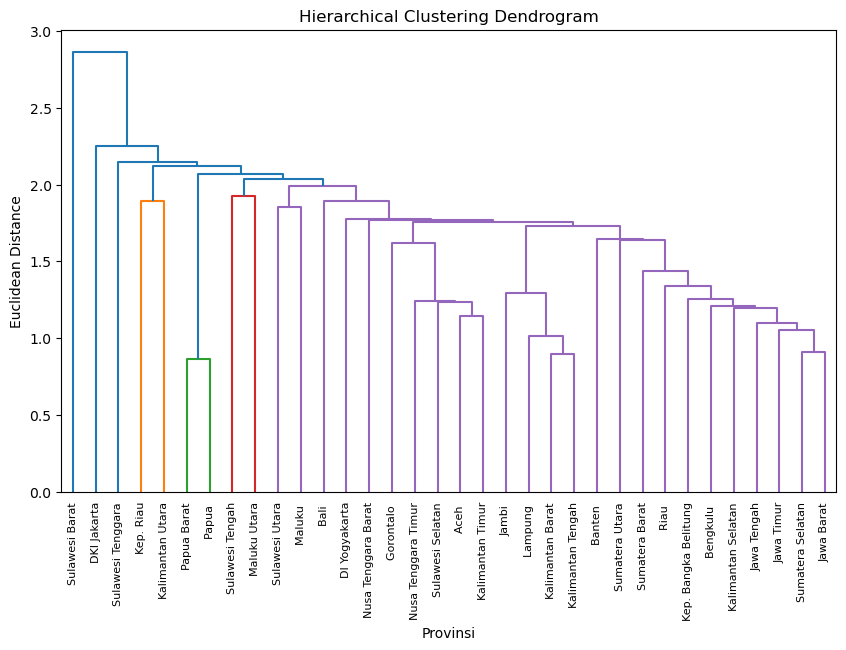

In [36]:
import scipy.cluster.hierarchy as hcluster
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist

# Assuming data_grouped is your data
labels = le.inverse_transform(df['Prov'])

# Create a linkage matrix
linkage_matrix = hcluster.linkage(df_hc_array, method='single')

# Create a dendrogram
plt.figure(figsize=(10, 6))
dend = hcluster.dendrogram(linkage_matrix, labels=[labels[i] for i in range(len(labels))])
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Provinsi')
plt.ylabel('Euclidean Distance')

# Atur label menjadi vertikal
plt.xticks(rotation='vertical')
plt.show()

**Metode Ward**

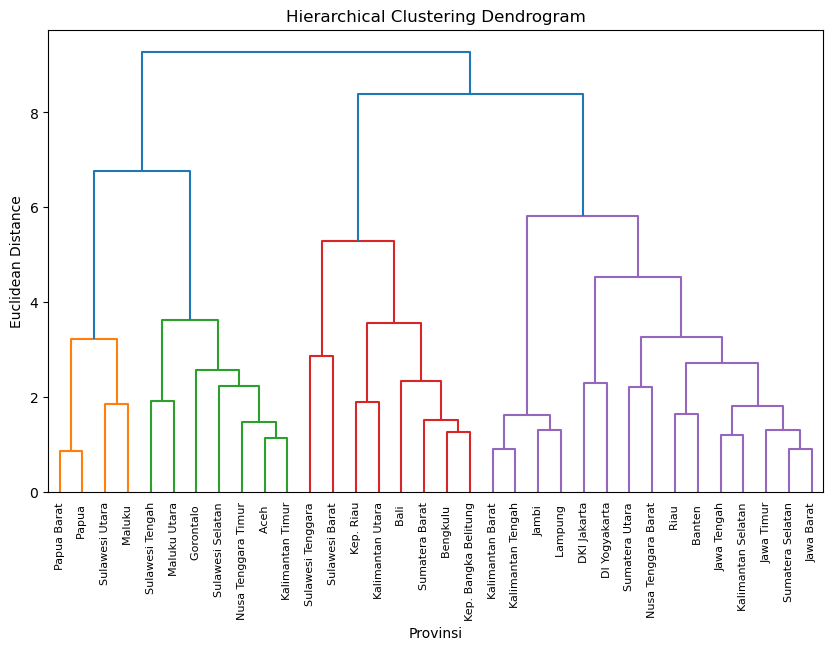

In [37]:
import scipy.cluster.hierarchy as hcluster
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist

# Assuming data_grouped is your data
labels = le.inverse_transform(df['Prov'])

# Create a linkage matrix
linkage_matrix = hcluster.linkage(df_hc_array, method='ward')

# Create a dendrogram
plt.figure(figsize=(10, 6))
dend = hcluster.dendrogram(linkage_matrix, labels=[labels[i] for i in range(len(labels))])
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Provinsi')
plt.ylabel('Euclidean Distance')

# Atur label menjadi vertikal
plt.xticks(rotation='vertical')
plt.show()

**Metode Average**

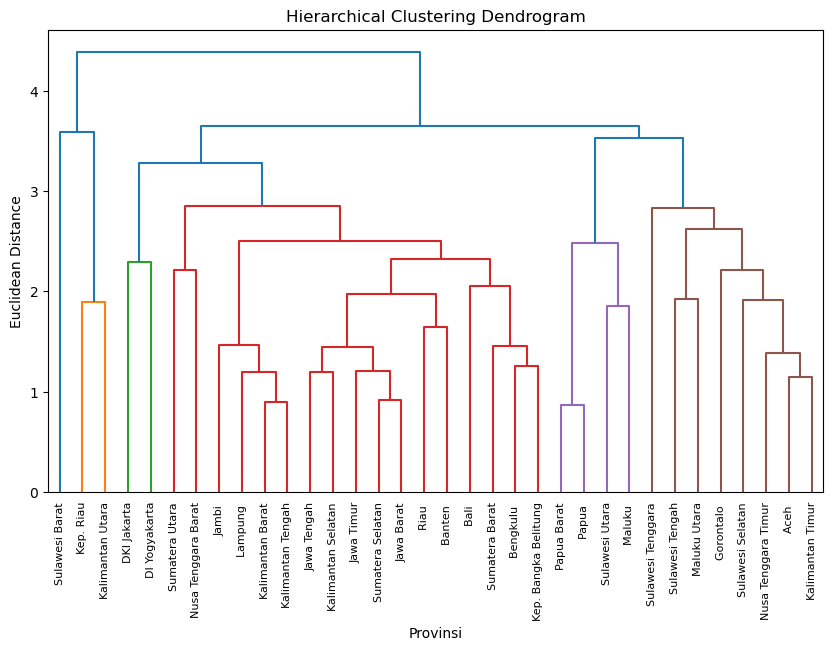

In [38]:
import scipy.cluster.hierarchy as hcluster
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Assuming data_grouped is your data
labels = le.inverse_transform(df['Prov'])

# Create a linkage matrix
linkage_matrix = hcluster.linkage(df_hc_array, method='average')

# Create a dendrogram
plt.figure(figsize=(10, 6))
dend = hcluster.dendrogram(linkage_matrix, labels=[labels[i] for i in range(len(labels))])

# Atur label menjadi vertikal
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Provinsi')
plt.ylabel('Euclidean Distance')
plt.xticks(rotation='vertical')
plt.show()

**Metode Complete**

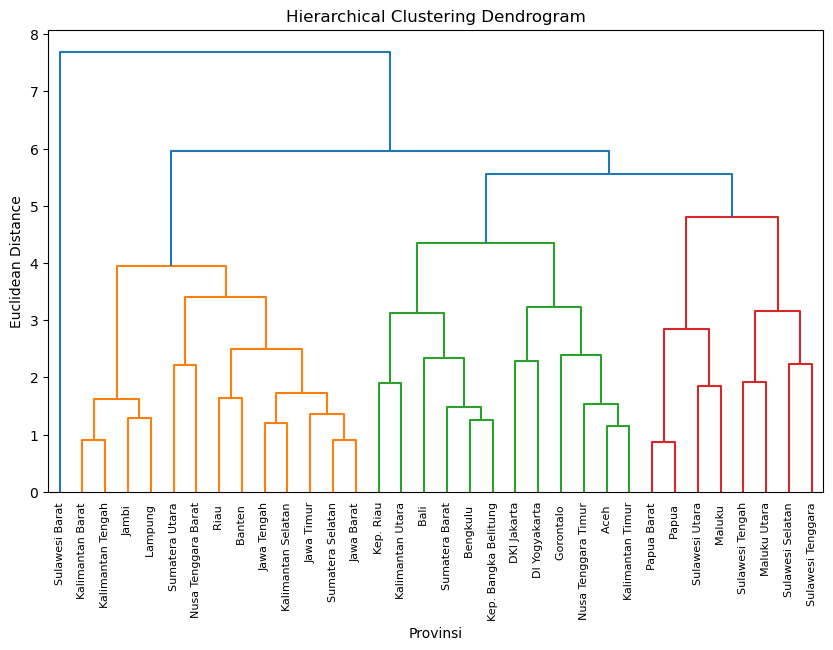

In [39]:
import scipy.cluster.hierarchy as hcluster
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Assuming data_grouped is your data
labels = le.inverse_transform(df['Prov'])

# Create a linkage matrix
linkage_matrix = hcluster.linkage(df_hc_array, method='complete')

# Create a dendrogram
plt.figure(figsize=(10, 6))
dend = hcluster.dendrogram(linkage_matrix, labels=[labels[i] for i in range(len(labels))])
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Provinsi')
plt.ylabel('Euclidean Distance')

# Atur label menjadi vertikal
plt.xticks(rotation='vertical')
plt.show()

# K-Means Spatial

In [40]:
km = momhealth.copy()
km

,Prov,X1,X2,X3,X4,X5,X6
0,Aceh,70,15.27,30.51,15.48,96.70,59.01
1,Sumatera Utara,56,10.80,43.39,11.93,68.99,23.10
2,Sumatera Barat,97,45.80,37.30,10.17,72.73,41.93
3,Riau,76,17.77,40.86,11.12,70.83,45.55
4,Jambi,101,57.25,35.39,12.94,67.45,31.12
5,Sumatera Selatan,64,7.66,36.18,12.02,67.42,37.45
6,Bengkulu,87,30.57,35.76,10.41,80.64,32.40
7,Lampung,87,40.10,34.26,12.72,61.85,32.03
8,Kep. Bangka Belitung,96,31.43,33.65,12.09,78.17,43.47
9,Kep. Riau,133,36.65,33.42,10.20,79.44,58.91


Standarisasi data dulu sebelum K-Means

In [41]:
from sklearn.preprocessing import StandardScaler

# Pisahkan kolom Provinsi (indeks) untuk keperluan visualisasi nanti
PROV = km['Prov']

# Normalisasi data numerik (kecuali kolom Provinsi)
scaler = StandardScaler()
km_scaled = scaler.fit_transform(km.drop('Prov', axis=1))
km_scaled

array([[-0.26842833, -0.63306003, -1.06003811,  1.06353183,  1.83013784,
         0.92870391],
       [-0.84658167, -0.88922357,  1.00661619, -0.49945724, -0.998489  ,
        -1.79843966],
       [ 0.84658167,  1.11653121,  0.02944812, -1.27434759, -0.61671115,
        -0.36841701],
       [-0.02064833, -0.48979183,  0.60066624, -0.85608291, -0.81066246,
        -0.09350028],
       [ 1.01176834,  1.77269956, -0.27702002, -0.05477584, -1.15569165,
        -1.18937   ],
       [-0.51620834, -1.06916843, -0.15026095, -0.45983216, -1.15875404,
        -0.70864545],
       [ 0.433615  ,  0.24374134, -0.21765185, -1.16868073,  0.19073881,
        -1.09216188],
       [ 0.433615  ,  0.78987972, -0.45833364, -0.15163713, -1.72733764,
        -1.1202611 ],
       [ 0.805285  ,  0.2930256 , -0.5562109 , -0.42901266, -0.0613979 ,
        -0.25146348],
       [ 2.33326168,  0.5921696 , -0.59311544, -1.26113923,  0.06824324,
         0.92110953],
       [-1.46603167, -1.30240906, -0.95895176, -0.

Coba langsung dari K-Means nya terbentuk berapa klaster dengan elbow

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

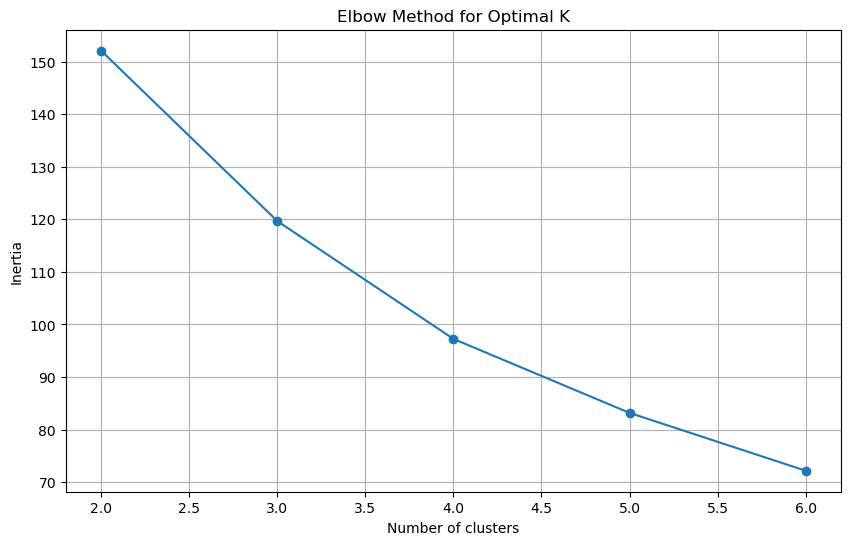

In [42]:
from sklearn.cluster import KMeans

# Tentukan range jumlah klaster yang ingin diuji
range_n_clusters = [2,3,4,5,6]

# Hitung inersia untuk setiap nilai klaster dalam range
inertias = []
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(km_scaled)
    inertias.append(kmeans.inertia_)

# Plot metode Elbow untuk menentukan jumlah klaster yang optimal
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, inertias, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()

**Lihat nilai silhouette tertinggi**

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

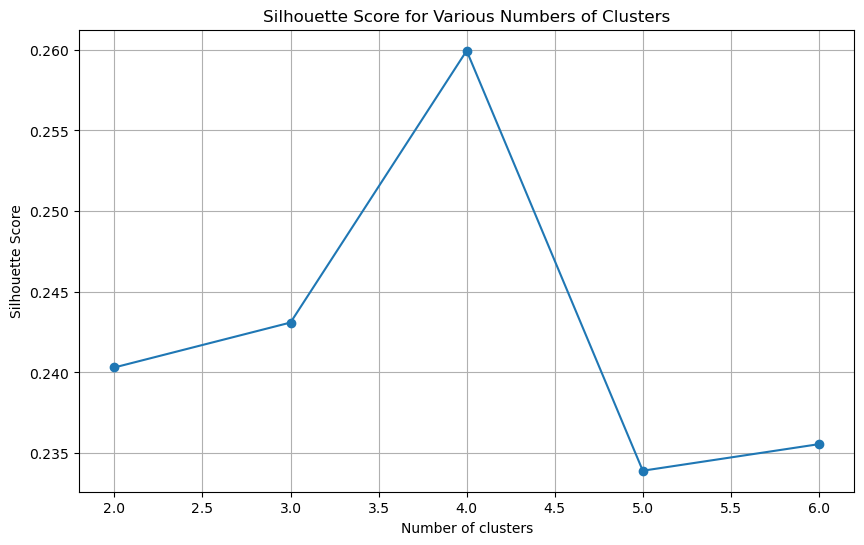

In [43]:
# Tentukan range jumlah klaster yang ingin diuji
range_n_clusters = [2,3,4,5,6]

# Simpan nilai silhouette score untuk setiap jumlah klaster
silhouette_scores = []

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(km_scaled)
    
    # Hitung nilai silhouette score
    silhouette_avg = silhouette_score(km_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

    # Plot nilai silhouette score untuk setiap jumlah klaster
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Various Numbers of Clusters')
plt.grid(True)
plt.show()

Ternyata sama nilai silhouette tertinggi dibentuk oleh 4 klaster

In [44]:
# Melakukan klastering dengan K-Means
kmeans = KMeans(n_clusters=4, random_state=42)
km['CLUSTER'] = kmeans.fit_predict(km_scaled)
km

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,Prov,X1,X2,X3,X4,X5,X6,CLUSTER
0,Aceh,70,15.27,30.51,15.48,96.70,59.01,1
1,Sumatera Utara,56,10.80,43.39,11.93,68.99,23.10,2
2,Sumatera Barat,97,45.80,37.30,10.17,72.73,41.93,2
3,Riau,76,17.77,40.86,11.12,70.83,45.55,2
4,Jambi,101,57.25,35.39,12.94,67.45,31.12,2
5,Sumatera Selatan,64,7.66,36.18,12.02,67.42,37.45,2
6,Bengkulu,87,30.57,35.76,10.41,80.64,32.40,2
7,Lampung,87,40.10,34.26,12.72,61.85,32.03,2
8,Kep. Bangka Belitung,96,31.43,33.65,12.09,78.17,43.47,2
9,Kep. Riau,133,36.65,33.42,10.20,79.44,58.91,3


In [47]:
silhouette_avg = silhouette_score(km_scaled, km['CLUSTER'])

# Output hasil klastering dan evaluasi
print(km[['Prov', 'CLUSTER']])

# Visualisasi klastering (contoh menggunakan dua dimensi RJPRM dan PIMLL)
#plt.figure(figsize=(8, 6))
#plt.scatter(km_scaled[:, 0], km_scaled[:, 3], c=km['CLUSTER'], cmap='viridis')
#plt.title('K-Means Clustering')
#plt.xlabel('RJPRM')
#plt.ylabel('PIMLL')
#plt.colorbar(label='CLUSTER')
#plt.show()

# Menampilkan nilai evaluasi
print(f"Silhouette Score: {silhouette_avg}")

                    Prov  CLUSTER
0                  Aceh         1
1         Sumatera Utara        2
2         Sumatera Barat        2
3                  Riau         2
4                 Jambi         2
5       Sumatera Selatan        2
6              Bengkulu         2
7               Lampung         2
8   Kep. Bangka Belitung        2
9              Kep. Riau        3
10           DKI Jakarta        1
11            Jawa Barat        2
12           Jawa Tengah        2
13         DI Yogyakarta        1
14            Jawa Timur        2
15               Banten         2
16                 Bali         3
17   Nusa Tenggara Barat        2
18   Nusa Tenggara Timur        1
19      Kalimantan Barat        2
20     Kalimantan Tengah        2
21    Kalimantan Selatan        2
22      Kalimantan Timur        1
23      Kalimantan Utara        3
24        Sulawesi Utara        0
25       Sulawesi Tengah        0
26      Sulawesi Selatan        1
27     Sulawesi Tenggara        3
28            

Terbentuk 4 klaster:
- 0 : Sulawesi Utara, Sulawesi Tengah, Maluku, Maluku Utara, Papua Barat, Papua
- 1 : Aceh, DKI Jakarta, DI Yogyakarta, Nusa Tenggara Timur, Kalimantan Timur, Sulawesi Selatan, Gorontalo
- 2 : Sumatera Utara, Sumatera Barat, Riau, Jambi, Sumatera Selatan, Bengkulu, Lampung, Kep. Bangka Belitung, Jawa Barat, Jawa Tengah, Jawa Timur, Banten, Nusa Tenggara Barat, Kalimantan Barat, Kalimantan Tengah, Kalimantan Selatan
- 3 :  Kep. Riau, Bali, Kalimantan Utara, Sulawesi Tenggara, Sulawesi Barat

In [48]:
# Memilih kolom yang ingin disertakan
num_cols = ['X1', 'X2', 'X3','X4', 'X5', 'X6','CLUSTER']

# DataFrame baru tanpa beberapa kolom
km_num = km[num_cols]

**Rata-rata tiap klaster**

In [49]:
klas0 = km_num[km_num['CLUSTER']==0].mean()  #Sangat rendah
klas0

X1         51.333333
X2         17.975000
X3         46.731667
X4         14.775000
X5         81.018333
X6         56.181667
CLUSTER     0.000000
dtype: float64

In [50]:
klas1 = km_num[km_num['CLUSTER']==1].mean() #Rendah
klas1

X1         67.714286
X2         20.360000
X3         31.474286
X4         14.375714
X5         88.730000
X6         56.991429
CLUSTER     1.000000
dtype: float64

In [51]:
klas2 = km_num[km_num['CLUSTER']==2].mean() #Sedang
klas2

X1         77.062500
X2         25.377500
X3         35.716250
X4         12.170625
X5         70.614375
X6         35.545000
CLUSTER     2.000000
dtype: float64

In [52]:
klas3 = km_num[km_num['CLUSTER']==3].mean() #Tinggi
klas3

X1         117.200
X2          47.672
X3          37.958
X4          12.036
X5          88.236
X6          57.162
CLUSTER      3.000
dtype: float64

# Kruskal Wallis

**Normalitas**

In [53]:
from scipy.stats import kstest

# Uji Kolmogorov-Smirnov untuk setiap kelompok klaster
stat_0, p_0 = kstest(klas0, 'norm')
stat_1, p_1 = kstest(klas1, 'norm')
stat_2, p_2 = kstest(klas2, 'norm')
stat_3, p_3 = kstest(klas3, 'norm')

# Output hasil uji Kolmogorov-Smirnov
print(f"Hasil uji Kolmogorov-Smirnov untuk klaster 0: Statistic={stat_0}, p-value={p_0}")
print(f"Hasil uji Kolmogorov-Smirnov untuk klaster 1: Statistic={stat_1}, p-value={p_1}")
print(f"Hasil uji Kolmogorov-Smirnov untuk klaster 2: Statistic={stat_2}, p-value={p_2}")
print(f"Hasil uji Kolmogorov-Smirnov untuk klaster 3: Statistic={stat_3}, p-value={p_3}")


Hasil uji Kolmogorov-Smirnov untuk klaster 0: Statistic=0.8571428571428572, p-value=2.428531357804017e-06
Hasil uji Kolmogorov-Smirnov untuk klaster 1: Statistic=0.8571428571428572, p-value=2.428531357804017e-06
Hasil uji Kolmogorov-Smirnov untuk klaster 2: Statistic=0.9772498680518208, p-value=6.308374022585913e-12
Hasil uji Kolmogorov-Smirnov untuk klaster 3: Statistic=0.9986501019683699, p-value=1.6335662198539653e-20


Hipotesis Nol (H0):
- H0: Sampel-sampel yang diuji berdistribusi normal.

Hipotesis Alternatif (H1):
- H1: Sampel-sampel yang diuji tidak berdistribusi normal.

Tolak Ho, tidak normal

In [54]:
from scipy.stats import kruskal

# Lakukan uji Kruskal-Wallis
statistic, p_value = kruskal(klas0, klas1, klas2, klas3)

# Output hasil uji
print(f"Nilai H: {statistic:.4f}")
print(f"Nilai p: {p_value:.4f}")

Nilai H: 0.6312
Nilai p: 0.8892


Hipotesis Nol (H0):
- H0: Tidak ada perbedaan signifikan antara median atau distribusi kelompok-kelompok yang diuji.

Hipotesis Alternatif (H1):
- H1: Terdapat perbedaan signifikan antara median atau distribusi setidaknya dua kelompok yang diuji.

Nilai p: 0.889243614328466, gagal tolak H0

# Visualisasi

In [55]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

In [56]:
cluster = km[['Prov', 'CLUSTER']]

# Rename a province (e.g., 'DKI Jakarta' to 'Jakarta')
cluster['Prov'] = cluster['Prov'].replace({'DKI Jakarta': 'Jakarta Raya'})
cluster['Prov'] = cluster['Prov'].replace({'Kep. Bangka Belitung': 'Bangka Belitung'})
cluster['Prov'] = cluster['Prov'].replace({'Kep. Riau': 'Kepulauan Riau'})
cluster['Prov'] = cluster['Prov'].replace({'DI Yogyakarta': 'Yogyakarta'})
cluster

C:\Users\HP\AppData\Local\Temp\ipykernel_23264\526357874.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster['Prov'] = cluster['Prov'].replace({'DKI Jakarta': 'Jakarta Raya'})
C:\Users\HP\AppData\Local\Temp\ipykernel_23264\526357874.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster['Prov'] = cluster['Prov'].replace({'Kep. Bangka Belitung': 'Bangka Belitung'})
C:\Users\HP\AppData\Local\Temp\ipykernel_23264\526357874.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

,Prov,CLUSTER
0,Aceh,1
1,Sumatera Utara,2
2,Sumatera Barat,2
3,Riau,2
4,Jambi,2
5,Sumatera Selatan,2
6,Bengkulu,2
7,Lampung,2
8,Bangka Belitung,2
9,Kepulauan Riau,3


In [57]:
cluster = pd.read_csv('cluster_data.csv')
cluster

,Prov,CLUSTER
0,Aceh,1
1,Sumatera Utara,2
2,Sumatera Barat,2
3,Riau,2
4,Jambi,2
5,Sumatera Selatan,2
6,Bengkulu,2
7,Lampung,2
8,Bangka Belitung,2
9,Kepulauan Riau,3


In [66]:
# Save the DataFrame to a CSV file
#csv_file_path = 'C:/Users/Chafshoh Nafilah/OneDrive - Institut Teknologi Sepuluh Nopember/COOLYEAH/SEMESTER 6/ANALISIS DATA STATISTIK/FP/cluster_data.csv'
#cluster.to_csv(csv_file_path, index=False)

In [58]:
# Define the path to the shapefile
#"C:\Users\HP\OneDrive - Institut Teknologi Sepuluh Nopember\SEMESTER 6\ADS\FP\FP Kesehatan Ibu Indonesia 2022"
shapefile_path = 'C:/Users/HP/OneDrive - Institut Teknologi Sepuluh Nopember/SEMESTER 6/ADS/FP/FP Kesehatan Ibu Indonesia 2022/gadm41_IDN_shp/gadm41_IDN_1.shp'

In [59]:
# Load the shapefile
gdf = gpd.read_file(shapefile_path)
gdf

# Save the DataFrame to a CSV file
csv_file_path = 'C:/Users/HP/OneDrive - Institut Teknologi Sepuluh Nopember/SEMESTER 6/ADS/FP/FP Kesehatan Ibu Indonesia 2022/gdf.csv'
gdf.to_csv(csv_file_path, index=False)

In [69]:
gdf = gdf.merge(cluster, left_on='NAME_1', right_on='Prov')
gdf

,GID_1,GID_0,COUNTRY,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,ISO_1,geometry,Prov,CLUSTER
0,IDN.1_1,IDN,Indonesia,Aceh,NA,NA,Propinisi,Province,11,ID.AC,ID-AC,"MULTIPOLYGON (((98.14903 2.13627, 98.14943 2.1...",Aceh,1
1,IDN.2_1,IDN,Indonesia,Bali,NA,NA,Propinisi,Province,51,ID.BA,ID-BA,"MULTIPOLYGON (((115.52573 -8.80446, 115.52539 ...",Bali,3
2,IDN.3_1,IDN,Indonesia,Bangka Belitung,NA,NA,Propinisi,Province,19,ID.BB,NA,"MULTIPOLYGON (((107.96136 -3.41619, 107.96083 ...",Bangka Belitung,2
3,IDN.4_1,IDN,Indonesia,Banten,NA,NA,Propinisi,Province,36,ID.BT,ID-BT,"MULTIPOLYGON (((106.38681 -6.99070, 106.38654 ...",Banten,2
4,IDN.5_1,IDN,Indonesia,Bengkulu,NA,NA,Propinisi,Province,17,ID.BE,ID-BE,"MULTIPOLYGON (((103.57295 -4.92303, 103.57290 ...",Bengkulu,2
5,IDN.6_1,IDN,Indonesia,Gorontalo,NA,NA,Propinisi,Province,75,ID.GO,ID-GO,"MULTIPOLYGON (((123.54913 0.43251, 123.54884 0...",Gorontalo,1
6,IDN.7_1,IDN,Indonesia,Jakarta Raya,NA,NA,Propinisi,Province,31,ID.JK,ID-JK,"MULTIPOLYGON (((106.86717 -6.35462, 106.86707 ...",Jakarta Raya,1
7,IDN.8_1,IDN,Indonesia,Jambi,NA,NA,Propinisi,Province,15,ID.JA,ID-JA,"MULTIPOLYGON (((101.87180 -2.72919, 101.86636 ...",Jambi,2
8,IDN.9_1,IDN,Indonesia,Jawa Barat,NA,NA,Propinisi,Province,32,ID.JR,ID-JB,"MULTIPOLYGON (((108.13315 -7.78342, 108.13236 ...",Jawa Barat,2
9,IDN.10_1,IDN,Indonesia,Jawa Tengah,NA,NA,Propinisi,Province,33,ID.JT,ID-JT,"MULTIPOLYGON (((110.00440 -7.88545, 110.00392 ...",Jawa Tengah,2


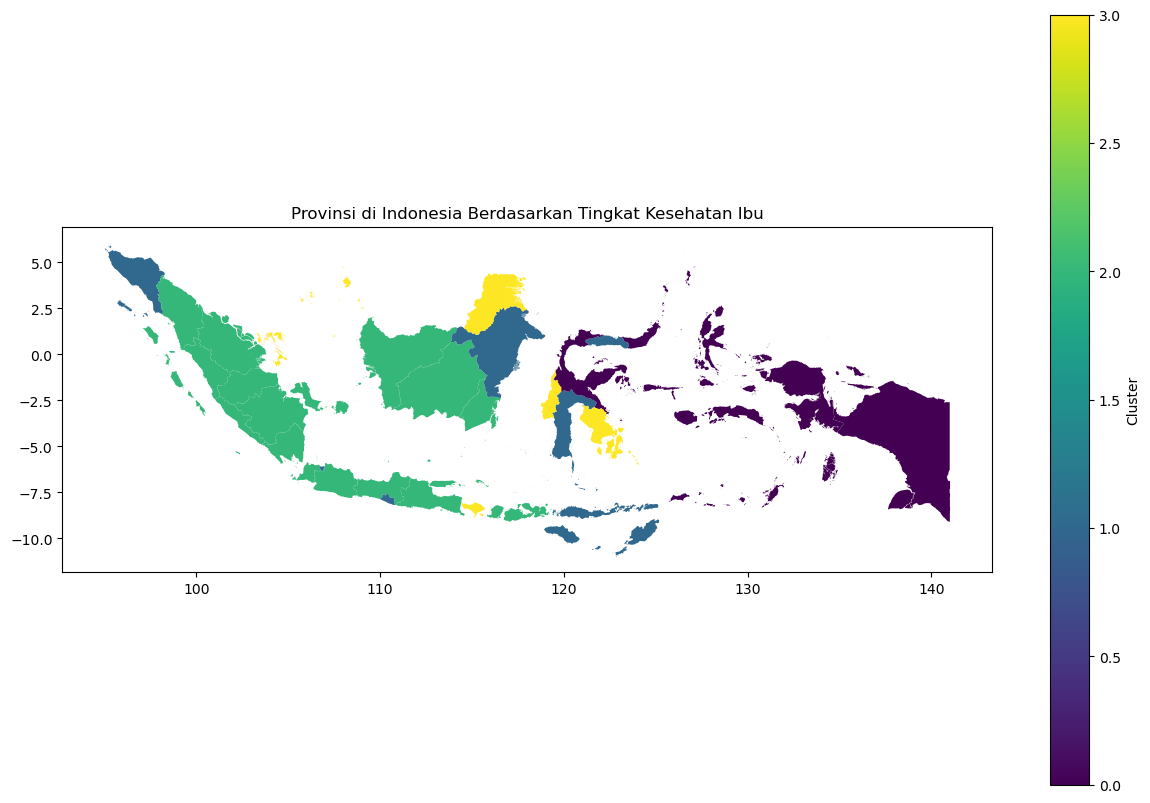

In [70]:
gdf.plot(column='CLUSTER', figsize=(15, 10), legend=True, legend_kwds={'label': "Cluster"})

plt.title('Provinsi di Indonesia Berdasarkan Tingkat Kesehatan Ibu')
plt.show()

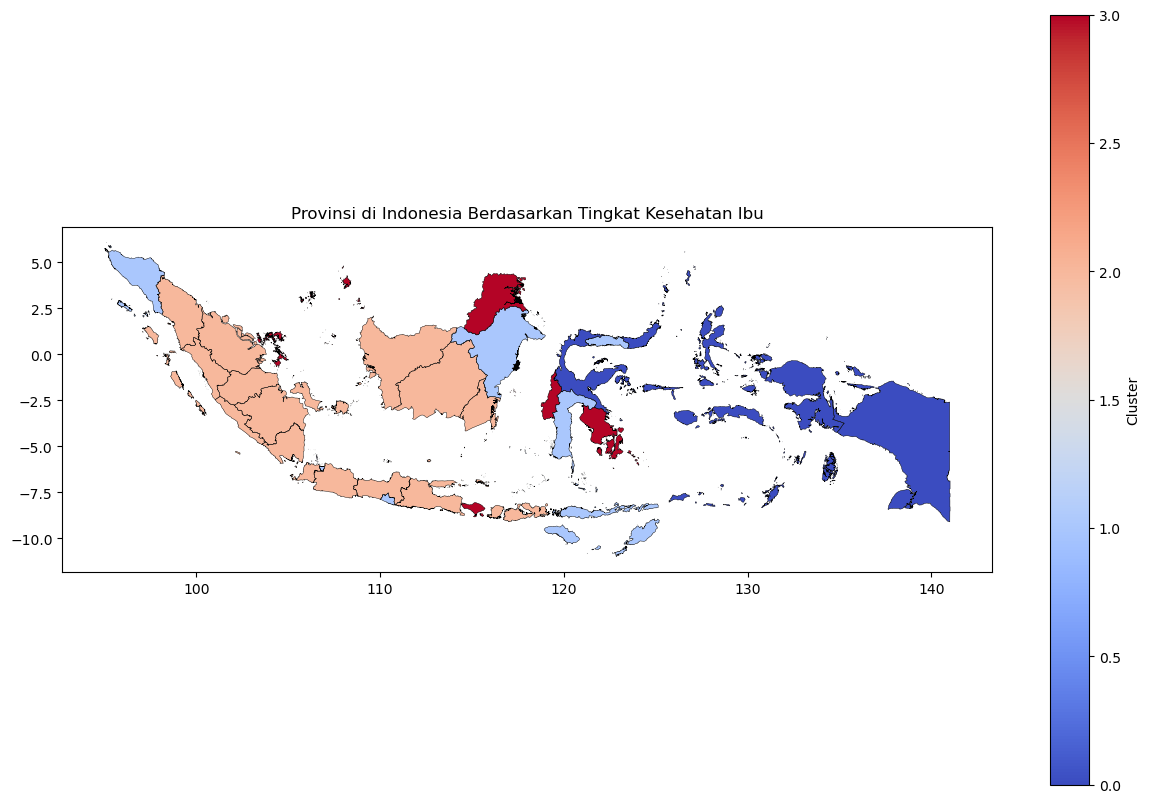

In [71]:
# Plotting
fig, ax = plt.subplots(figsize=(15, 10))

# Memplot kolom 'CLUSTER' dengan warna berbeda untuk setiap cluster
gdf.plot(column='CLUSTER', ax=ax, legend=True, legend_kwds={'label': "Cluster"}, cmap='coolwarm')

# Menambahkan judul plot
plt.title('Provinsi di Indonesia Berdasarkan Tingkat Kesehatan Ibu')

# Menambahkan batas antar provinsi dengan garis hitam
gdf.boundary.plot(ax=ax, linewidth=0.3, color='black')

# Menampilkan plot
plt.show()